In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("srinivasbece/lung-cancer-preprocessed-dataset")

print("Path to dataset files:", path)

100%|██████████| 885M/885M [00:10<00:00, 91.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/srinivasbece/lung-cancer-preprocessed-dataset/versions/1


In [2]:
import os

dataset_path = '/root/.cache/kagglehub/datasets/srinivasbece/lung-cancer-preprocessed-dataset/versions/1'
os.listdir(dataset_path)


['lung']

In [3]:
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.

  Args:
    dir_path (str): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers


In [5]:
train_dir = "/root/.cache/kagglehub/datasets/srinivasbece/lung-cancer-preprocessed-dataset/versions/1/lung/Train"
val_dir = "/root/.cache/kagglehub/datasets/srinivasbece/lung-cancer-preprocessed-dataset/versions/1/lung/Val"
test_dir = "/root/.cache/kagglehub/datasets/srinivasbece/lung-cancer-preprocessed-dataset/versions/1/lung/Test"

In [6]:
IMG_SIZE = (256, 256)
BATCH_SIZE = 32
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                                 image_size = IMG_SIZE,
                                                                 label_mode = "categorical",
                                                                 batch_size = BATCH_SIZE,
                                                                 shuffle = True)
val_data = tf.keras.preprocessing.image_dataset_from_directory(directory = val_dir,
                                                                 image_size = IMG_SIZE,
                                                                 label_mode = "categorical",
                                                                 batch_size = BATCH_SIZE,
                                                                 shuffle = False)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                 image_size = IMG_SIZE,
                                                                 label_mode = "categorical",
                                                                 batch_size = BATCH_SIZE,
                                                                 shuffle = True)

Found 11250 files belonging to 3 classes.
Found 1875 files belonging to 3 classes.
Found 1875 files belonging to 3 classes.


In [7]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

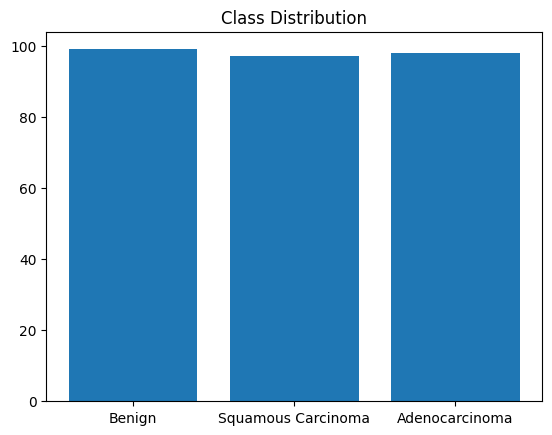

In [8]:
import matplotlib.pyplot as plt
import numpy as np

class_distribution = [len(class_dir) for class_dir in [train_dir, val_dir, test_dir]]
plt.bar(np.arange(len(class_distribution)), class_distribution)
plt.title("Class Distribution")
plt.xticks(np.arange(len(class_distribution)), ['Benign', 'Squamous Carcinoma', 'Adenocarcinoma'])
plt.show()


In [ ]:
for images, labels in train_data.take(1):
  print(images, labels)

tf.Tensor(
[[[[202.59184  177.59184  180.59184 ]
   [222.2143   197.2143   200.2143  ]
   [221.19897  196.19897  199.19897 ]
   ...
   [219.       195.       195.      ]
   [216.88304  192.88304  192.88304 ]
   [212.12767  188.12767  188.12767 ]]

  [[220.2296   195.2296   198.2296  ]
   [229.38266  204.38266  207.38266 ]
   [221.2143   196.2143   199.2143  ]
   ...
   [218.       194.       194.      ]
   [219.47946  195.47946  195.47946 ]
   [217.18378  193.18378  193.18378 ]]

  [[221.       196.       199.      ]
   [220.35715  195.35715  198.35715 ]
   [219.       194.       197.      ]
   ...
   [218.       194.       194.      ]
   [218.92857  194.92857  194.92857 ]
   [217.14287  193.14287  193.14287 ]]

  ...

  [[206.22955  168.08673  190.87239 ]
   [215.47955  184.71425  195.954   ]
   [219.07143  194.07143  197.13774 ]
   ...
   [190.57129  137.28055  193.42337 ]
   [196.04614  149.28601  195.33179 ]
   [220.5      181.49994  213.12758 ]]

  [[204.21379  170.92815  183.8566

In [ ]:
walk_through_dir(dataset_path)

There are 1 directories and 0 images in '/root/.cache/kagglehub/datasets/srinivasbece/lung-cancer-preprocessed-dataset/versions/1'.
There are 3 directories and 0 images in '/root/.cache/kagglehub/datasets/srinivasbece/lung-cancer-preprocessed-dataset/versions/1/lung'.
There are 3 directories and 0 images in '/root/.cache/kagglehub/datasets/srinivasbece/lung-cancer-preprocessed-dataset/versions/1/lung/Train'.
There are 0 directories and 3750 images in '/root/.cache/kagglehub/datasets/srinivasbece/lung-cancer-preprocessed-dataset/versions/1/lung/Train/squamous_carcinoma'.
There are 0 directories and 3750 images in '/root/.cache/kagglehub/datasets/srinivasbece/lung-cancer-preprocessed-dataset/versions/1/lung/Train/benign'.
There are 0 directories and 3750 images in '/root/.cache/kagglehub/datasets/srinivasbece/lung-cancer-preprocessed-dataset/versions/1/lung/Train/adenocarcinoma'.
There are 3 directories and 0 images in '/root/.cache/kagglehub/datasets/srinivasbece/lung-cancer-preprocesse

### EfficientNetB4

In [9]:
base_model = tf.keras.applications.EfficientNetB4(include_top=False)

71686520/71686520 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
base_model.trainable = True

for layer in base_model.layers[:-10]:
  layer.trainable = False


In [11]:
data_augmentation = keras.Sequential([
    #layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    #layers.Rescaling(1./255)
], name="data_augmentation")

In [12]:
input_shape = (256, 256, 3)

inputs = tf.keras.layers.Input(shape = input_shape, name = "input_layer")

x = data_augmentation(inputs)

x = base_model(x, training = False)

x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)

outputs = tf.keras.layers.Dense(3, activation = "softmax", name = "output_layer")(x)

model_2 = tf.keras.Model(inputs, outputs)

model_2.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics = ['accuracy']
)


history_2 = model_2.fit(train_data,
                        epochs = 10,
                        validation_data = val_data)

Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 150s 341ms/step - accuracy: 0.8379 - loss: 0.4145 - val_accuracy: 0.9653 - val_loss: 0.1093
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 139s 342ms/step - accuracy: 0.9455 - loss: 0.1455 - val_accuracy: 0.9739 - val_loss: 0.0759
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 133s 318ms/step - accuracy: 0.9618 - loss: 0.1074 - val_accuracy: 0.9829 - val_loss: 0.0496
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 121s 345ms/step - accuracy: 0.9694 - loss: 0.0925 - val_accuracy: 0.9856 - val_loss: 0.0521
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 141s 344ms/step - accuracy: 0.9710 - loss: 0.0826 - val_accuracy: 0.9888 - val_loss: 0.0350
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 134s 320ms/step - accuracy: 0.9785 - loss: 0.0707 - val_accuracy: 0.9893 - val_loss: 0.0312
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 146s 333ms/step - accuracy: 0.9769 - loss: 0.0648 - val_accuracy: 0.9872 - val_loss: 0.0384
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 119s 337ms/step - accuracy: 0.9806 -

In [13]:
import matplotlib.pyplot as plt
def plot_loss_curves(history):
  """
    Returns separate loss curves for training and validation metrics.

    Args:
      history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();


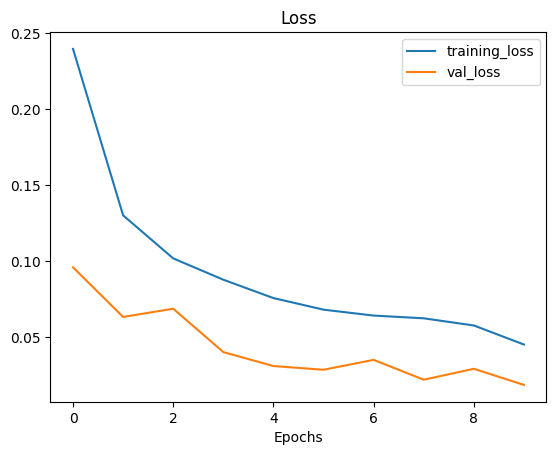

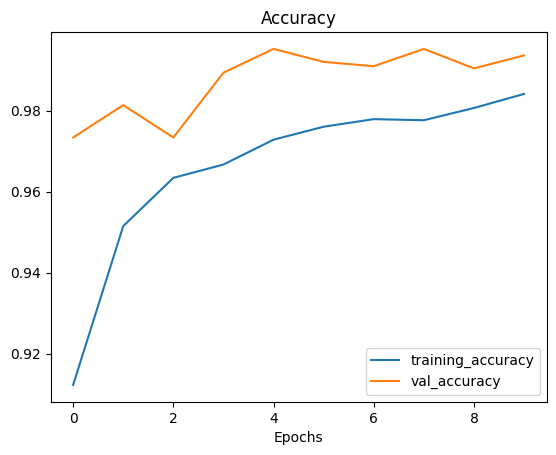

In [ ]:
plot_loss_curves(history_2)

In [14]:
class_names = ['benign', 'adenocarcinoma', 'squamous_carcinoma']


In [15]:
def create_classification_heatmap(true_labels, pred_labels, class_names):
    """
    Create a heatmap of classification metrics
    """
    from sklearn.metrics import confusion_matrix

    # Create confusion matrix
    cm = confusion_matrix(true_labels, pred_labels)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm,
                annot=True,
                fmt='d',
                cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

In [16]:
def load_and_prep_image(filename, img_shape=256, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).

  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.image.decode_jpeg(img, channels = 3)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [18]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model_2.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence, predictions

In [19]:
parent_dir = "/root/.cache/kagglehub/datasets/srinivasbece/lung-cancer-preprocessed-dataset/versions/1/lung/Test/"
class_names = [f for f in os.listdir(parent_dir) if os.path.isdir(os.path.join(parent_dir, f))]
for class_name in class_names:
    print(class_name)

adenocarcinoma
squamous_carcinoma
benign


first image to predict
actual label: squamous_carcinoma
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
predicted label: squamous_carcinoma


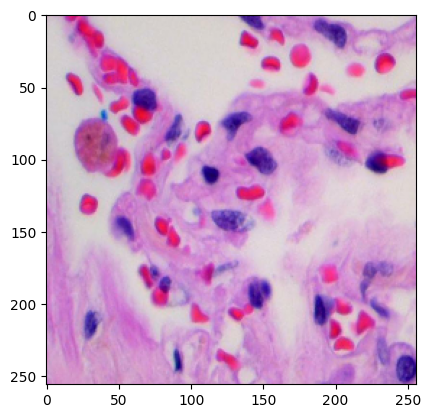

In [20]:
import numpy as np
for images_batch, labels_batch in test_data:

    first_image = images_batch[0]
    first_label = int(tf.argmax(labels_batch[0]).numpy())

    print("first image to predict")
    plt.imshow(first_image/255.)
    print("actual label:",class_names[first_label])

    batch_prediction = model_2.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    break

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


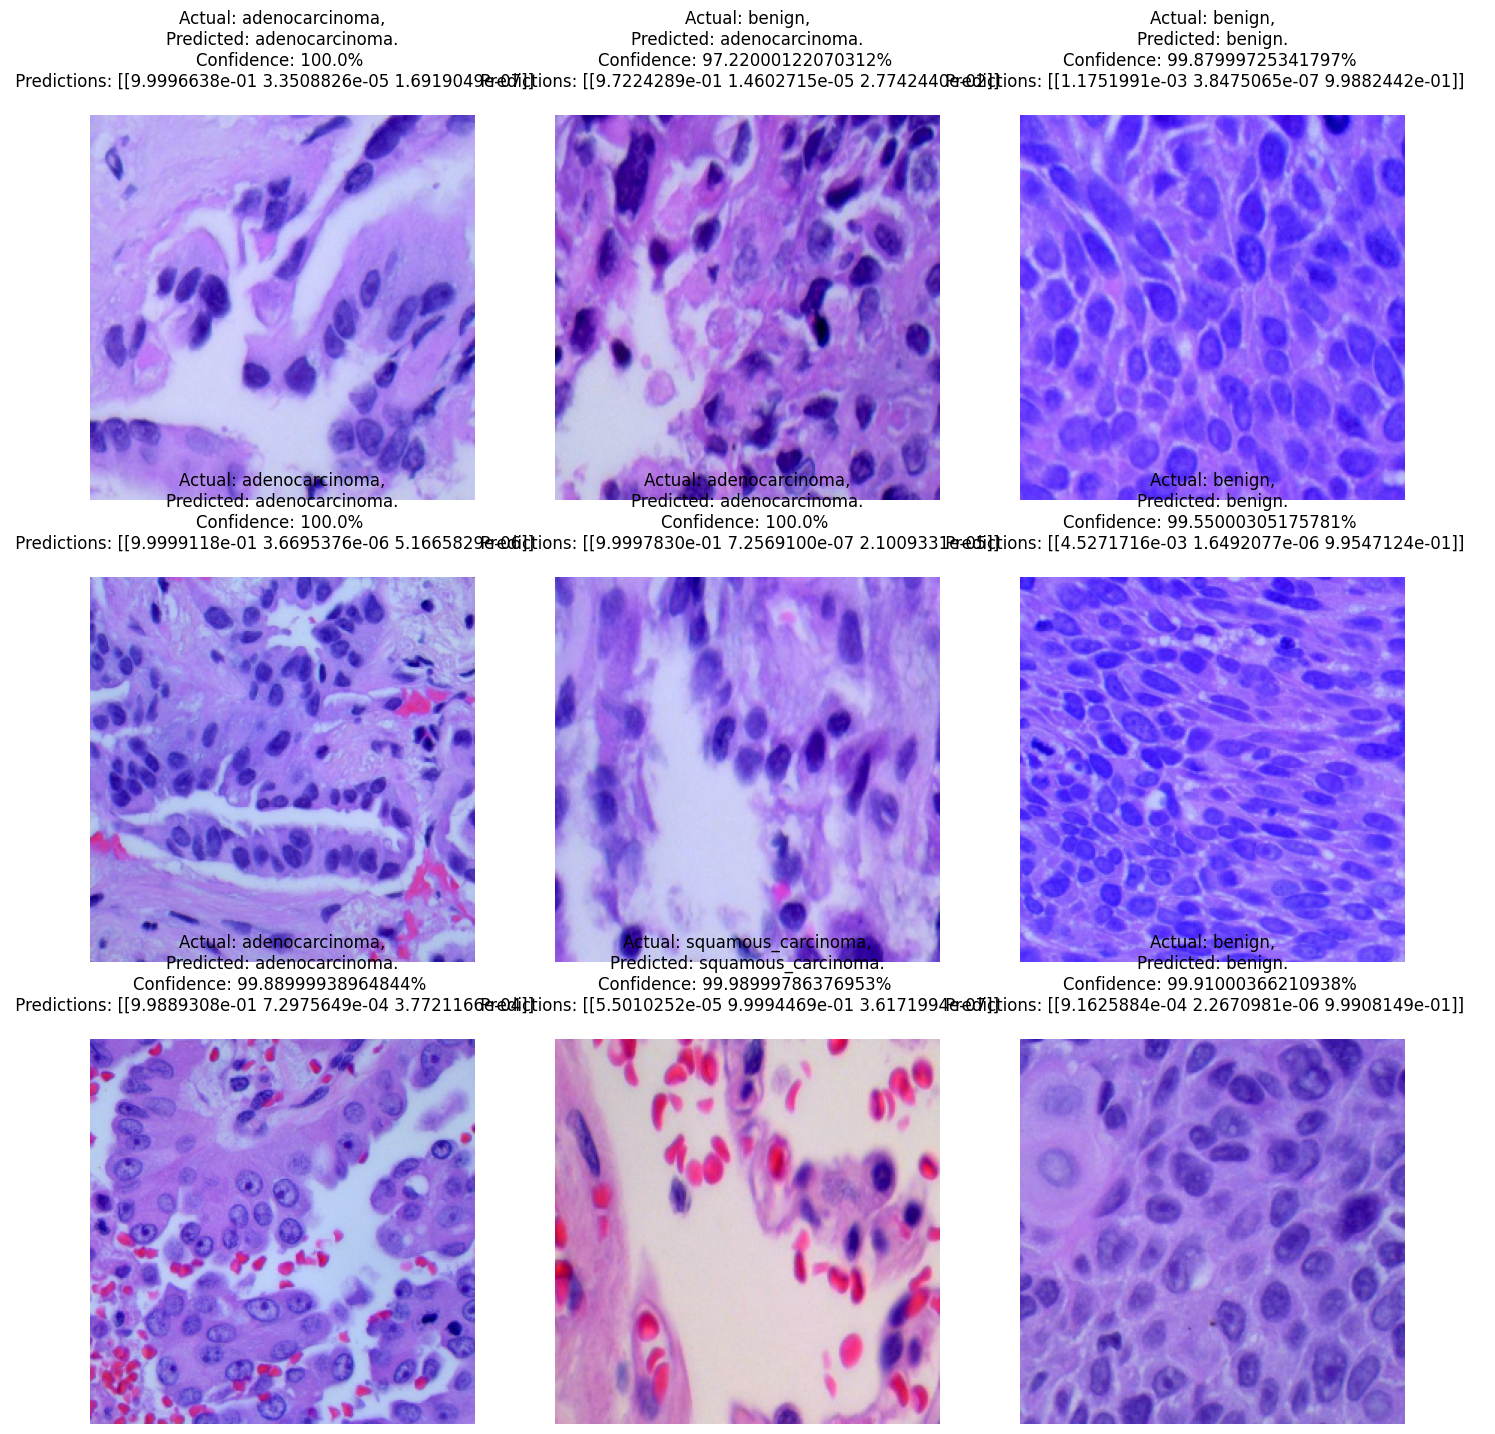

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Adjust image scaling if needed (normalize to range [0, 1])
# Assuming images are in the [0, 255] range, we normalize them to [0, 1]

plt.figure(figsize=(17, 17))
for images, labels in test_data:
    # Normalize images to the range [0, 1] if necessary

    for i in range(9):  # Iterate over the first 9 images in the batch
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i] / 255.0)  # Display the image

        # Get predicted class and confidence
        predicted_class, confidence, predictions = predict(model_2, images[i])

        # Extract the actual class from one-hot encoded labels
        actual_class = class_names[np.argmax(labels[i])]  # Use np.argmax for one-hot encoded labels

        # Display the actual class, predicted class, and confidence with larger font size
        plt.title(f"Actual: {actual_class},\nPredicted: {predicted_class}.\nConfidence: {confidence}% \n Predictions: {predictions}    \n", fontsize=12)
        plt.axis("off")  # Hide the axis for better visualization

    break  # Only visualize the first batch (remove this if you want to visualize more batches)

plt.show()


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(model, test_data, class_names):
    """
    This function calculates the confusion matrix for the given model on the test dataset
    and plots it using a heatmap.

    Parameters:
    - model: Trained model for prediction
    - test_data: Test dataset (images and labels)
    - class_names: List of class names
    """
    # Initialize lists to store actual and predicted labels
    y_true = []
    y_pred = []

    # Iterate through the test data and collect actual and predicted labels
    for images, labels in test_data:
        # Get model predictions
        batch_predictions = model.predict(images)
        predicted_labels = np.argmax(batch_predictions, axis=1)

        # Get actual labels (one-hot encoded)
        actual_labels = np.argmax(labels, axis=1)

        # Append to lists
        y_true.extend(actual_labels)
        y_pred.extend(predicted_labels)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.title('Confusion Matrix')
    plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

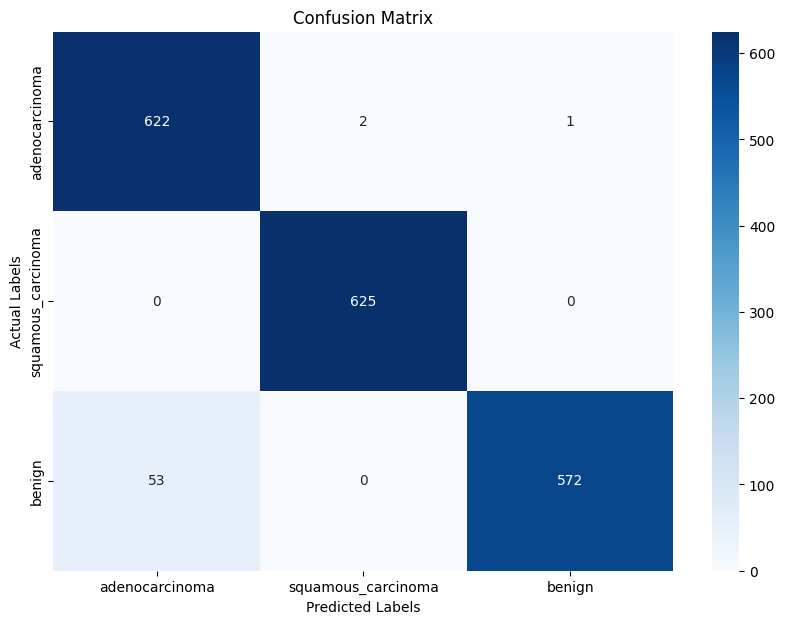

In [23]:
plot_confusion_matrix(model_2, test_data, class_names)

In [24]:
model_2.save('EfficientNetB4_Lung_Cancer_prediciton.keras')

In [25]:
from sklearn.metrics import precision_score
import numpy as np
import matplotlib.pyplot as plt

def evaluate_precision(model, test_data, class_names):
    """
    This function evaluates the precision of the model on the test dataset for each class.

    Parameters:
    - model: Trained model
    - test_data: Test dataset (images and labels)
    - class_names: List of class names
    """
    # Initialize lists to store actual and predicted labels
    y_true = []
    y_pred = []

    # Iterate through the test data and collect actual and predicted labels
    for images, labels in test_data:
        # Get model predictions
        batch_predictions = model.predict(images)
        predicted_labels = np.argmax(batch_predictions, axis=1)

        # Get actual labels (one-hot encoded)
        actual_labels = np.argmax(labels, axis=1)

        # Append to lists
        y_true.extend(actual_labels)
        y_pred.extend(predicted_labels)

    # Calculate precision for each class
    precision_per_class = precision_score(y_true, y_pred, average=None)

    # Plot precision scores for each class
    plt.figure(figsize=(10, 6))
    plt.bar(class_names, precision_per_class)
    plt.xlabel('Classes')
    plt.ylabel('Precision Score')
    plt.title('Precision Score per Class')
    plt.xticks(rotation=45)
    plt.show()

    # Calculate the average precision score (macro average)
    macro_precision = precision_score(y_true, y_pred, average='macro')
    print(f"Average Precision (Macro): {macro_precision:.4f}")

    return precision_per_class, macro_precision


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

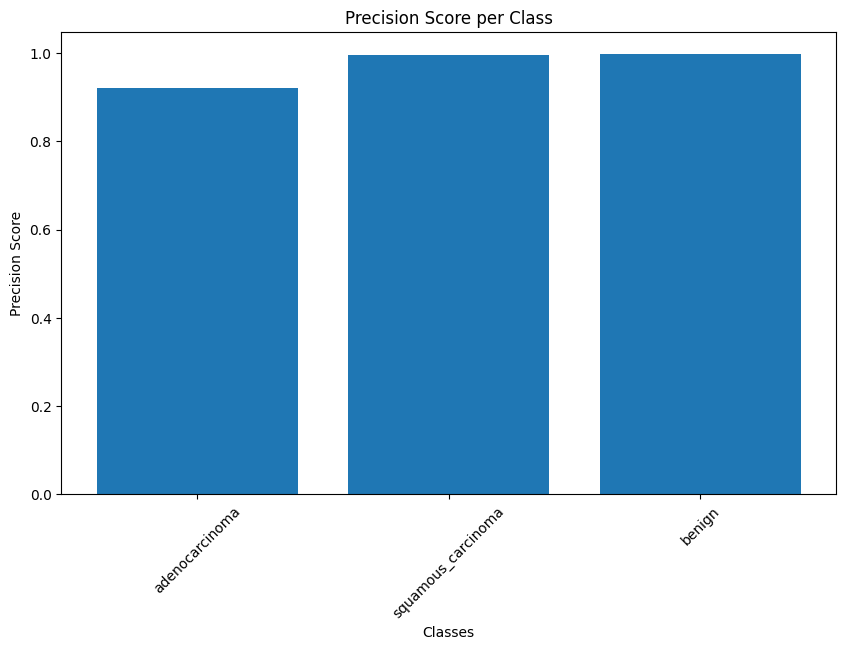

Average Precision (Macro): 0.9722


(array([0.92148148, 0.99681021, 0.9982548 ]), 0.9721821627066415)

In [26]:
evaluate_precision(model_2, test_data, class_names)

In [27]:
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

def evaluate_model_metrics(model, test_data, class_names):
    """
    This function evaluates the model on precision, recall, f1-score, and support for each class.

    Parameters:
    - model: Trained model
    - test_data: Test dataset (images and labels)
    - class_names: List of class names

    Returns:
    - None (prints the classification report)
    """
    # Initialize lists to store actual and predicted labels
    y_true = []
    y_pred = []

    # Iterate through the test data and collect actual and predicted labels
    for images, labels in test_data:
        # Get model predictions
        batch_predictions = model.predict(images)
        predicted_labels = np.argmax(batch_predictions, axis=1)

        # Get actual labels (one-hot encoded)
        actual_labels = np.argmax(labels, axis=1)

        # Append to lists
        y_true.extend(actual_labels)
        y_pred.extend(predicted_labels)

    # Get the classification report (Precision, Recall, F1-Score, and Support)
    report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)

    # Print classification report
    print("Classification Report:")
    print(f"Precision, Recall, F1-Score for each class:\n {classification_report(y_true, y_pred, target_names=class_names)}")

    # Extract precision, recall, f1-score for each class
    precision_per_class = report['macro avg']['precision']
    recall_per_class = report['macro avg']['recall']
    f1_per_class = report['macro avg']['f1-score']

    # Plot the Precision, Recall, and F1 scores for each class
    metrics = ['Precision', 'Recall', 'F1-Score']
    scores = {
        'Precision': [report[class_name]['precision'] for class_name in class_names],
        'Recall': [report[class_name]['recall'] for class_name in class_names],
        'F1-Score': [report[class_name]['f1-score'] for class_name in class_names]
    }

    # Plot the metrics
    plt.figure(figsize=(15, 5))
    for metric in metrics:
        plt.plot(class_names, scores[metric], marker='o', label=metric)

    plt.xlabel('Class Names')
    plt.ylabel('Scores')
    plt.title('Precision, Recall, and F1-Score for each Class')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Return the metrics as a dictionary for further use
    return {
        'precision': precision_per_class,
        'recall': recall_per_class,
        'f1_score': f1_per_class
    }


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

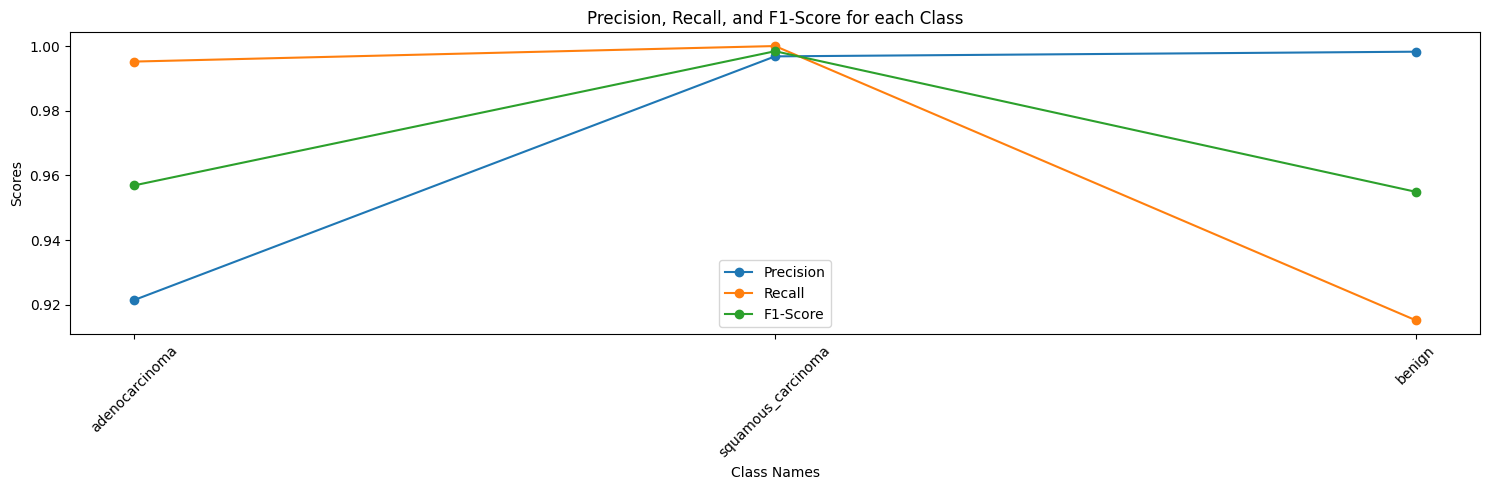

In [28]:
# Assuming `model_2` is your trained model, `test_data` is your test dataset,
# and `class_names` is a list of class names corresponding to the output labels.

metrics = evaluate_model_metrics(model_2, test_data, class_names)

# This will print the classification report and show a plot comparing Precision, Recall, and F1-Score.


In [ ]:
model_save = load_model('/content/model_lung.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


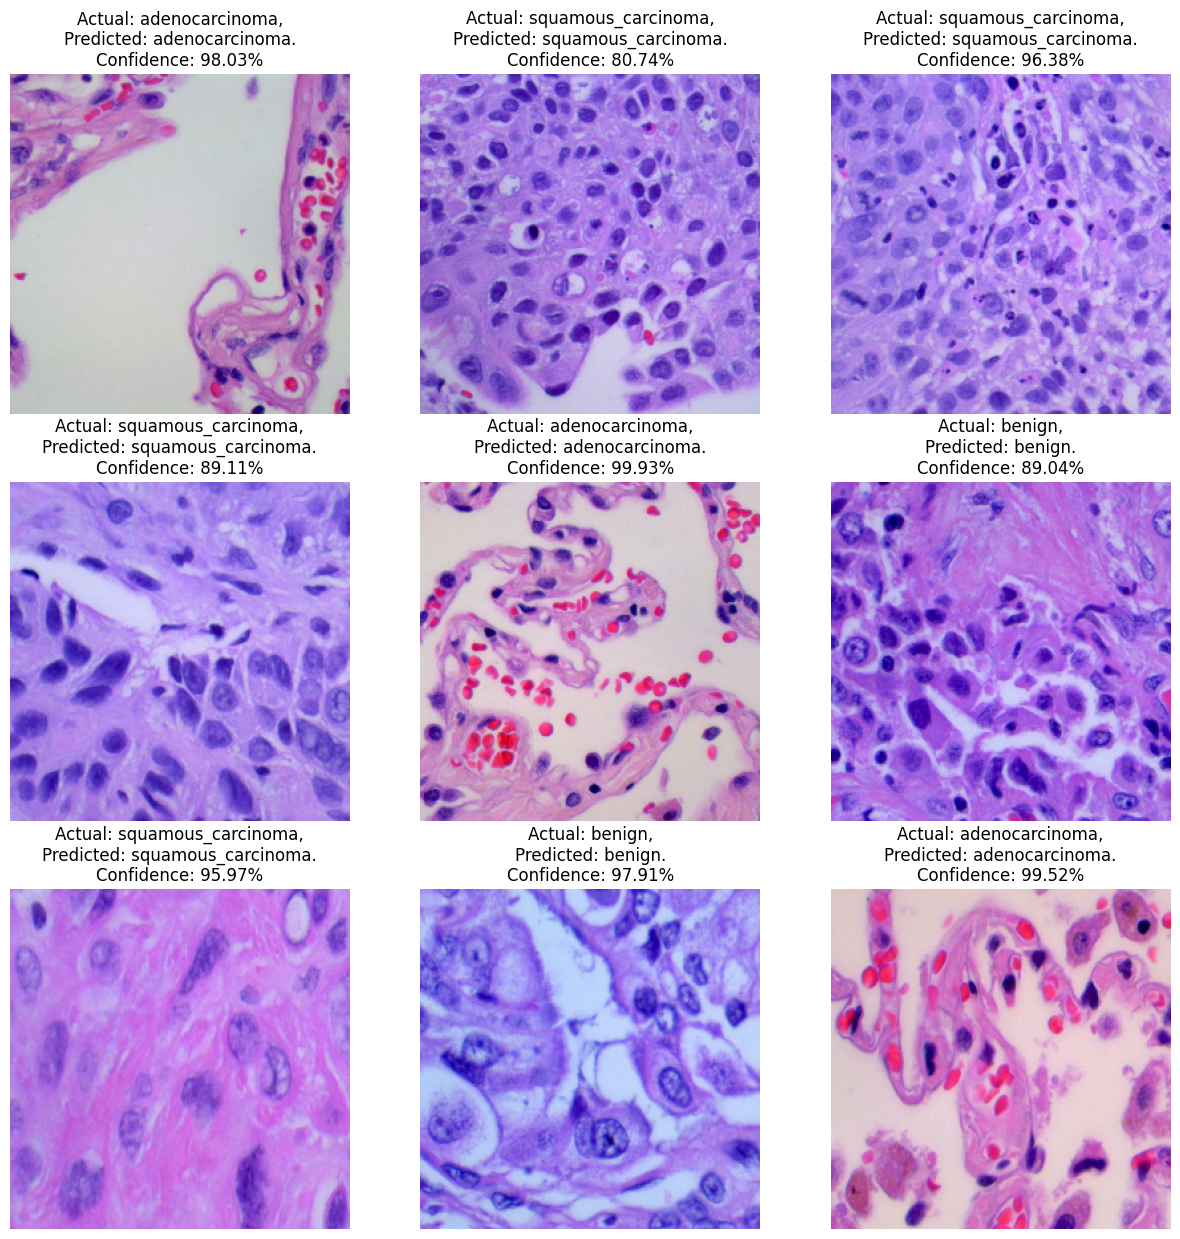

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Adjust image scaling if needed (normalize to range [0, 1])
# Assuming images are in the [0, 255] range, we normalize them to [0, 1]

plt.figure(figsize=(15, 15))
for images, labels in test_data:
    # Normalize images to the range [0, 1] if necessary

    for i in range(9):  # Iterate over the first 9 images in the batch
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i] / 255.0)  # Display the image

        # Get predicted class and confidence
        predicted_class, confidence = predict(model_save, images[i])

        # Extract the actual class from one-hot encoded labels
        actual_class = class_names[np.argmax(labels[i])]  # Use np.argmax for one-hot encoded labels

        # Display the actual class, predicted class, and confidence with larger font size
        plt.title(f"Actual: {actual_class},\nPredicted: {predicted_class}.\nConfidence: {confidence}%", fontsize=12)
        plt.axis("off")  # Hide the axis for better visualization

    break  # Only visualize the first batch (remove this if you want to visualize more batches)

plt.show()


lungscc4667.jpeg
/root/.cache/kagglehub/datasets/srinivasbece/lung-cancer-preprocessed-dataset/versions/1/lung/Test/squamous_carcinoma


Text(0.5, 1.0, 'lungscc4667.jpeg')

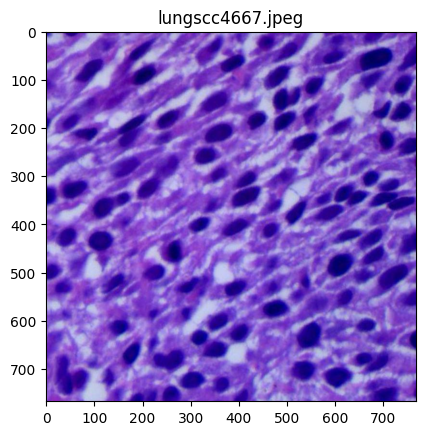

In [ ]:
import random
tf.random.set_seed(
    42
)
target_class = random.choice(train_data.class_names)
target_dir = "/root/.cache/kagglehub/datasets/srinivasbece/lung-cancer-preprocessed-dataset/versions/1/lung/Test/" + target_class
random_image = random.choice(os.listdir(target_dir))
print(random_image)
random_image_path = target_dir + "/" + random_image
print(target_dir)
img1 = mpimg.imread(random_image_path)
plt.imshow(img1)
plt.title(f"{random_image}")

In [ ]:
img1 = tf.image.resize(img1, (256, 256))
img1 = tf.expand_dims(img1, axis=0)
pred = model_2(img1)

In [ ]:
pred

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[5.3927436e-02, 1.2656946e-04, 9.4594598e-01]], dtype=float32)>

In [ ]:
pred_class = class_names[np.argmax(pred[0])]

In [ ]:
pred_class

'squamous_carcinoma'